In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from scipy import stats

### Central tendency

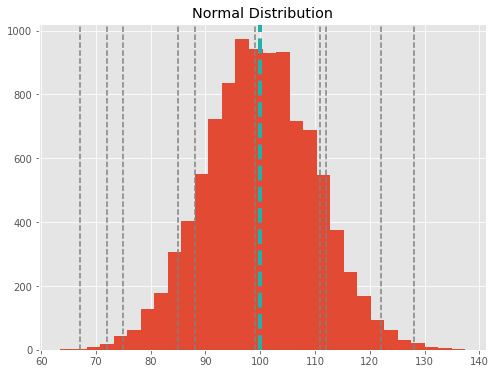

In [54]:
nums = np.random.normal(loc = 100,scale = 10, size = 10000)

figsize(8,6)
plt.title('Normal Distribution')
plt.hist(nums,bins = 30)
plt.axvline(np.mean(nums), linestyle = '--', color = 'lightseagreen', linewidth = 4)
for _ in range(10):
    plt.axvline(np.random.randint(60,130), linestyle = '--', color = 'gray')
plt.show()

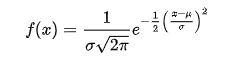

### Dispersion
variance - is a square(area)       
standard deviation - is a length(segment)       

In [55]:
def variance(arr,ddof = 0):
    N = len(arr)
    return ((arr - arr.mean())**2).sum() / (N - ddof)

def std(arr, ddof = 0):
    return np.sqrt(variance(arr, ddof = ddof))

Rewrite the formular

In [56]:
def mean(arr):
    '''Maximum likelihood estimation'''
    return sum(arr) / len(arr)

def deviation(arr):
    '''This is a distance'''
    return arr - mean(arr)

def squared_deviation(arr):
    '''This is the areas of mean squares'''
    return deviation(arr) ** 2

def average_squared_deviation(arr):
    '''This the area of a standard sqarure'''
    return squared_deviation(arr).sum() / len(arr)

def average_root_squared_deviation(arr):
    '''This is the edge length of a standard square '''
    return np.sqrt(average_squared_deviation(arr))

In [57]:
average_root_squared_deviation(nums) == np.std(nums)

True

**Takeaway: Use a standard length or standard area of a square to measure dispersion**

### Where r U             
How much you are away from the mean - not comparable                    
How many standard deviations you are away from the mean - comparable                 

In [58]:
90 - nums.mean(), 80 - nums.mean()

(-10.04185702388557, -20.04185702388557)

far or not far - depens on variability of the distribution

In [59]:
(90 - nums.mean()) / std(nums), (80 - nums.mean()) / std(nums)

(-1.0010717615275173, -1.997970800367014)

**Conclusion: The 2 samples are about 1 standard deviation from each other**

### Two Distributions - who is more unpopular

Xiaoming: -2.566666666666667, Xiaohua: -3.5277777777777777


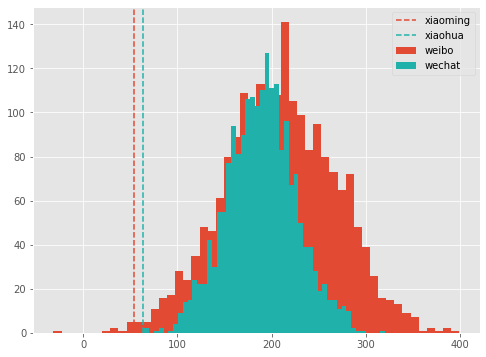

In [60]:
plt.style.use('ggplot')
weibo_mean = 208
wechat_mean = 190

wechat_std = 36
weibo_std = 60

xiaoming_weibo = 54
xiaohua_wechat = 63

# standard scaler, converted to standard normal distribution
Z_xiaoming = (xiaoming_weibo - weibo_mean) / weibo_std
Z_xiaohua = (xiaohua_wechat - wechat_mean) / wechat_std

print('Xiaoming: {}, Xiaohua: {}'.format(Z_xiaoming, Z_xiaohua))

plt.hist(stats.norm.rvs(loc = weibo_mean, scale = weibo_std, size = 2000),bins = 50, label = 'weibo')
plt.axvline(xiaoming_weibo, linestyle = '--', label = 'xiaoming')

plt.hist(stats.norm.rvs(loc = wechat_mean, scale = wechat_std, size = 2000),bins = 50, color = 'lightseagreen', label = 'wechat')
plt.axvline(xiaohua_wechat, linestyle = '--', color = 'lightseagreen', label = 'xiaohua')

plt.legend()
plt.show()

**Conclusion: Xiaohua is more unpopular than Xiaoming**   

In a standard normal distribution, Probability below 1.2 is  0.8819


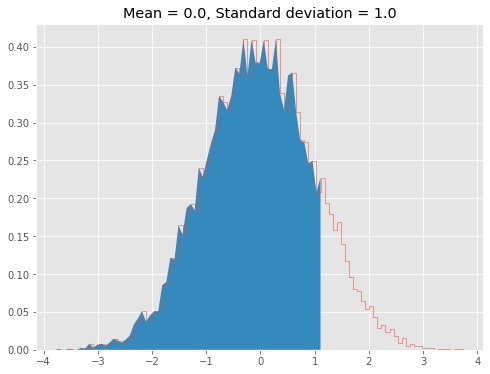

In [105]:
nums = np.random.normal(loc = 100,scale = 10, size = 10000)
standard_nums = (nums - nums.mean()) / nums.std()
val = 1.2

probability = len(standard_nums[standard_nums< val]) / len(standard_nums)

print(f'In a standard normal distribution, Probability below {val} is ',probability)
x = plt.hist(standard_nums,bins = 100, histtype = 'step', density = True)
loc = np.where(x[1]<val)[0][-1]
plt.fill_between(x[1][:loc],x[0][:loc] )
plt.title('Mean = {}, Standard deviation = {}'.format(round(standard_nums.mean(),3), standard_nums.std()))
plt.show()

Convert a distribution to a standard normal distribution

**Suppose we want to know the probability of a value less than -1**

#### Cumulative distribution Function to solve 
recall `empirical cumulative distribution function`    
which you learn in datacamp, `generated using observed data`        

Probability of obtaining a value less than `a give value` in a `standard normal distribution`

In [106]:
stats.norm.cdf(1.2)

0.8849303297782918

What about `between`, **subtract a negative cumulative prob from a positive cumulative prob**

In [107]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

#### Probability of a random draw from a standard normal distribution, that falls into a given range

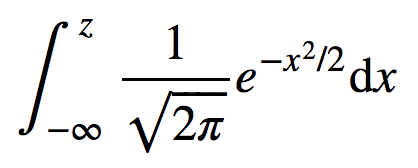

In [14]:
class Pmf(object):
    '''
        Probability distribution function

        Usage:
            pmf = Pmf()
            pmf.setp('a',1)
            pmf.setp('b',2)
            pmf.setp('c',3)
            pmf.normalize()
    '''
    def __init__(self):
        self.dist = dict()

    def setp(self, x, val):
        self.dist[x] = val

    def incr(self,x, increment = 1, default = 0):
        self.dist[x] = self.dist.get(x, default) + increment

    def normalize(self, inplace = True):
        total = sum(self.dist.values())
        if total == 0:
            raise ValueError('sum of probability = 0')

        normalized_dist = {k:v/total for k,v in self.dist.items()}
        if inplace:
            self.dist = normalized_dist
        return normalized_dist

    def multi(self, x, val):
        self.dist[x] = self.dist.get(x,0) * val

In [109]:
a = 1
b = 2